In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:,1:2].values
y = dataset.iloc[:,2:].values

In [3]:
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

/home/vishal/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [5]:
from sklearn.svm import SVR
regressor_rbf = SVR(kernel = 'rbf',verbose=True)
regressor_rbf.fit(X,y)
regressor_linear = SVR(kernel = 'linear',verbose=True)
regressor_linear.fit(X,y)
regressor_poly = SVR(kernel = 'poly',verbose=True)
regressor_poly.fit(X,y)

[LibSVM][LibSVM][LibSVM]

/home/vishal/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=True)

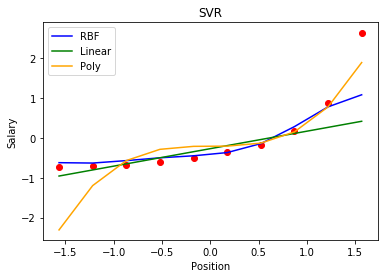

In [6]:
plt.scatter(X,y,color='red')
plt.plot(X,regressor_rbf.predict(X),color='blue',label='RBF')
plt.plot(X,regressor_linear.predict(X),color='green',label='Linear')
plt.plot(X,regressor_poly.predict(X),color='orange',label='Poly')
plt.title('SVR')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [8]:
#106K should be the exact output
sc_y.inverse_transform(regressor_rbf.predict(sc_X.transform(np.array([[6.5]]))))

array([170370.0204065])

In [9]:
sc_y.inverse_transform(regressor_linear.predict(sc_X.transform(np.array([[6.5]]))))

array([216903.83371158])

In [10]:
sc_y.inverse_transform(regressor_poly.predict(sc_X.transform(np.array([[6.5]]))))

array([197301.33007096])

In [ ]:
# from sklearn.datasets import load_breast_cancer
# cancer = load_breast_cancer()

In [ ]:
# print(cancer['DESCR'])

In [ ]:
# pd.DataFrame(cancer['data']).head()

In [ ]:
# import seaborn as sns
# sns.pairplot(pd.DataFrame(cancer['data']))